In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

raw = pd.read_csv('Backtest.csv')

df = raw.T
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)
df.rename

# Convert the numeric columns to float
numeric_columns = ['PnL', 'Fitness', 'TR', 'std(RR)', 'MDD', 'Win Rate', 'nTrade']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

strategy_mapping = {
    '0.002': 'STS1',
    '0.004': 'STS2',
    '0.005': 'STS3',
    '0.008': 'STS4'
}

data = df[df['Currency']=='USDCAD'].copy()

for threshold, strategy in strategy_mapping.items():
    data.loc[data['Threshold'] == threshold, 'Strategy'] = strategy

avg_dict = dict()
        
def update_strategy_dict(df, strategy_dict):
    for strategy in df['Strategy'].unique():
        sub_df = df[df['Strategy']==strategy]
        strategy_dict.update({
            strategy: [
                np.mean(sub_df['PnL']), np.mean(sub_df['Fitness']),
                np.mean(sub_df['TR']), np.mean(sub_df['std(RR)']),
                np.mean(sub_df['MDD']), np.mean(sub_df['Win Rate']),
                np.mean(sub_df['nTrade'])
            ]
        })

update_strategy_dict(data, avg_dict)

avgdf = pd.DataFrame(avg_dict)
avgdf['Index'] = ['PnL','Fitness','TR','std(RR)','MDD','Win Rate','nTrade']
avgdf.set_index('Index', inplace=True)

In [36]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for 'TR', 'MDD', and 'Win Rate' columns for each strategy
selected_cols = ['TR', 'MDD', 'Win Rate']
strategies_USDCAD = data['Strategy'].unique()
skew_kurt_strategy_USDCAD = pd.DataFrame(columns=['Strategy', 'Column', 'Skewness', 'Kurtosis'])
for strategy in strategies_USDCAD:
    strategy_data = data[data['Strategy'] == strategy]
    for col in selected_cols:
        skew_val = skew(strategy_data[col].dropna())
        kurt_val = kurtosis(strategy_data[col].dropna())
        skew_kurt_strategy_USDCAD = skew_kurt_strategy_USDCAD.append({
            'Strategy': strategy,
            'Column': col,
            'Skewness': skew_val,
            'Kurtosis': kurt_val
        }, ignore_index=True)

# Pivot the table for a better view
summary_table_USDCAD = skew_kurt_strategy_USDCAD.pivot_table(index='Strategy', columns='Column', values=['Skewness', 'Kurtosis'])
summary_table_USDCAD.columns = ['_'.join(col).strip() for col in summary_table_USDCAD.columns.values]
summary_table_USDCAD.reset_index(inplace=True)

# Display the summary table
summary_table_USDCAD

/var/folders/yj/9why7vcd7p71vxqyg4ln9nw40000gn/T/ipykernel_14525/2062129970.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skew_kurt_strategy_USDCAD = skew_kurt_strategy_USDCAD.append({
/var/folders/yj/9why7vcd7p71vxqyg4ln9nw40000gn/T/ipykernel_14525/2062129970.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skew_kurt_strategy_USDCAD = skew_kurt_strategy_USDCAD.append({
/var/folders/yj/9why7vcd7p71vxqyg4ln9nw40000gn/T/ipykernel_14525/2062129970.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skew_kurt_strategy_USDCAD = skew_kurt_strategy_USDCAD.append({
/var/folders/yj/9why7vcd7p71vxqyg4ln9nw40000gn/T/ipykernel_14525/2062129970.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

,Strategy,Kurtosis_MDD,Kurtosis_TR,Kurtosis_Win Rate,Skewness_MDD,Skewness_TR,Skewness_Win Rate
0,B&H,-0.733474,-0.977983,-1.885714,-0.439774,-0.039335,-0.338062
1,MACD,-0.632215,-1.227361,-0.801310,0.136147,-0.192082,-0.601151
2,MTS,0.124751,-1.313954,-0.391707,0.864953,0.102086,-0.154496
3,MTSGA,0.094730,-1.005774,-1.433240,0.931333,-0.465392,-0.189998
4,RSI,1.409052,-0.329388,-0.454675,1.371762,-0.349217,0.738915
5,STS1,-0.789051,-0.345906,-1.070452,0.661906,0.414930,-0.056545
6,STS2,5.718453,0.108482,-0.347945,2.691212,-0.508431,0.559830
7,STS3,2.946707,-0.732199,-0.430697,-0.623463,-0.493774,-0.379541
8,STS4,6.383721,-0.909757,0.638667,-2.809171,-0.191649,0.458203


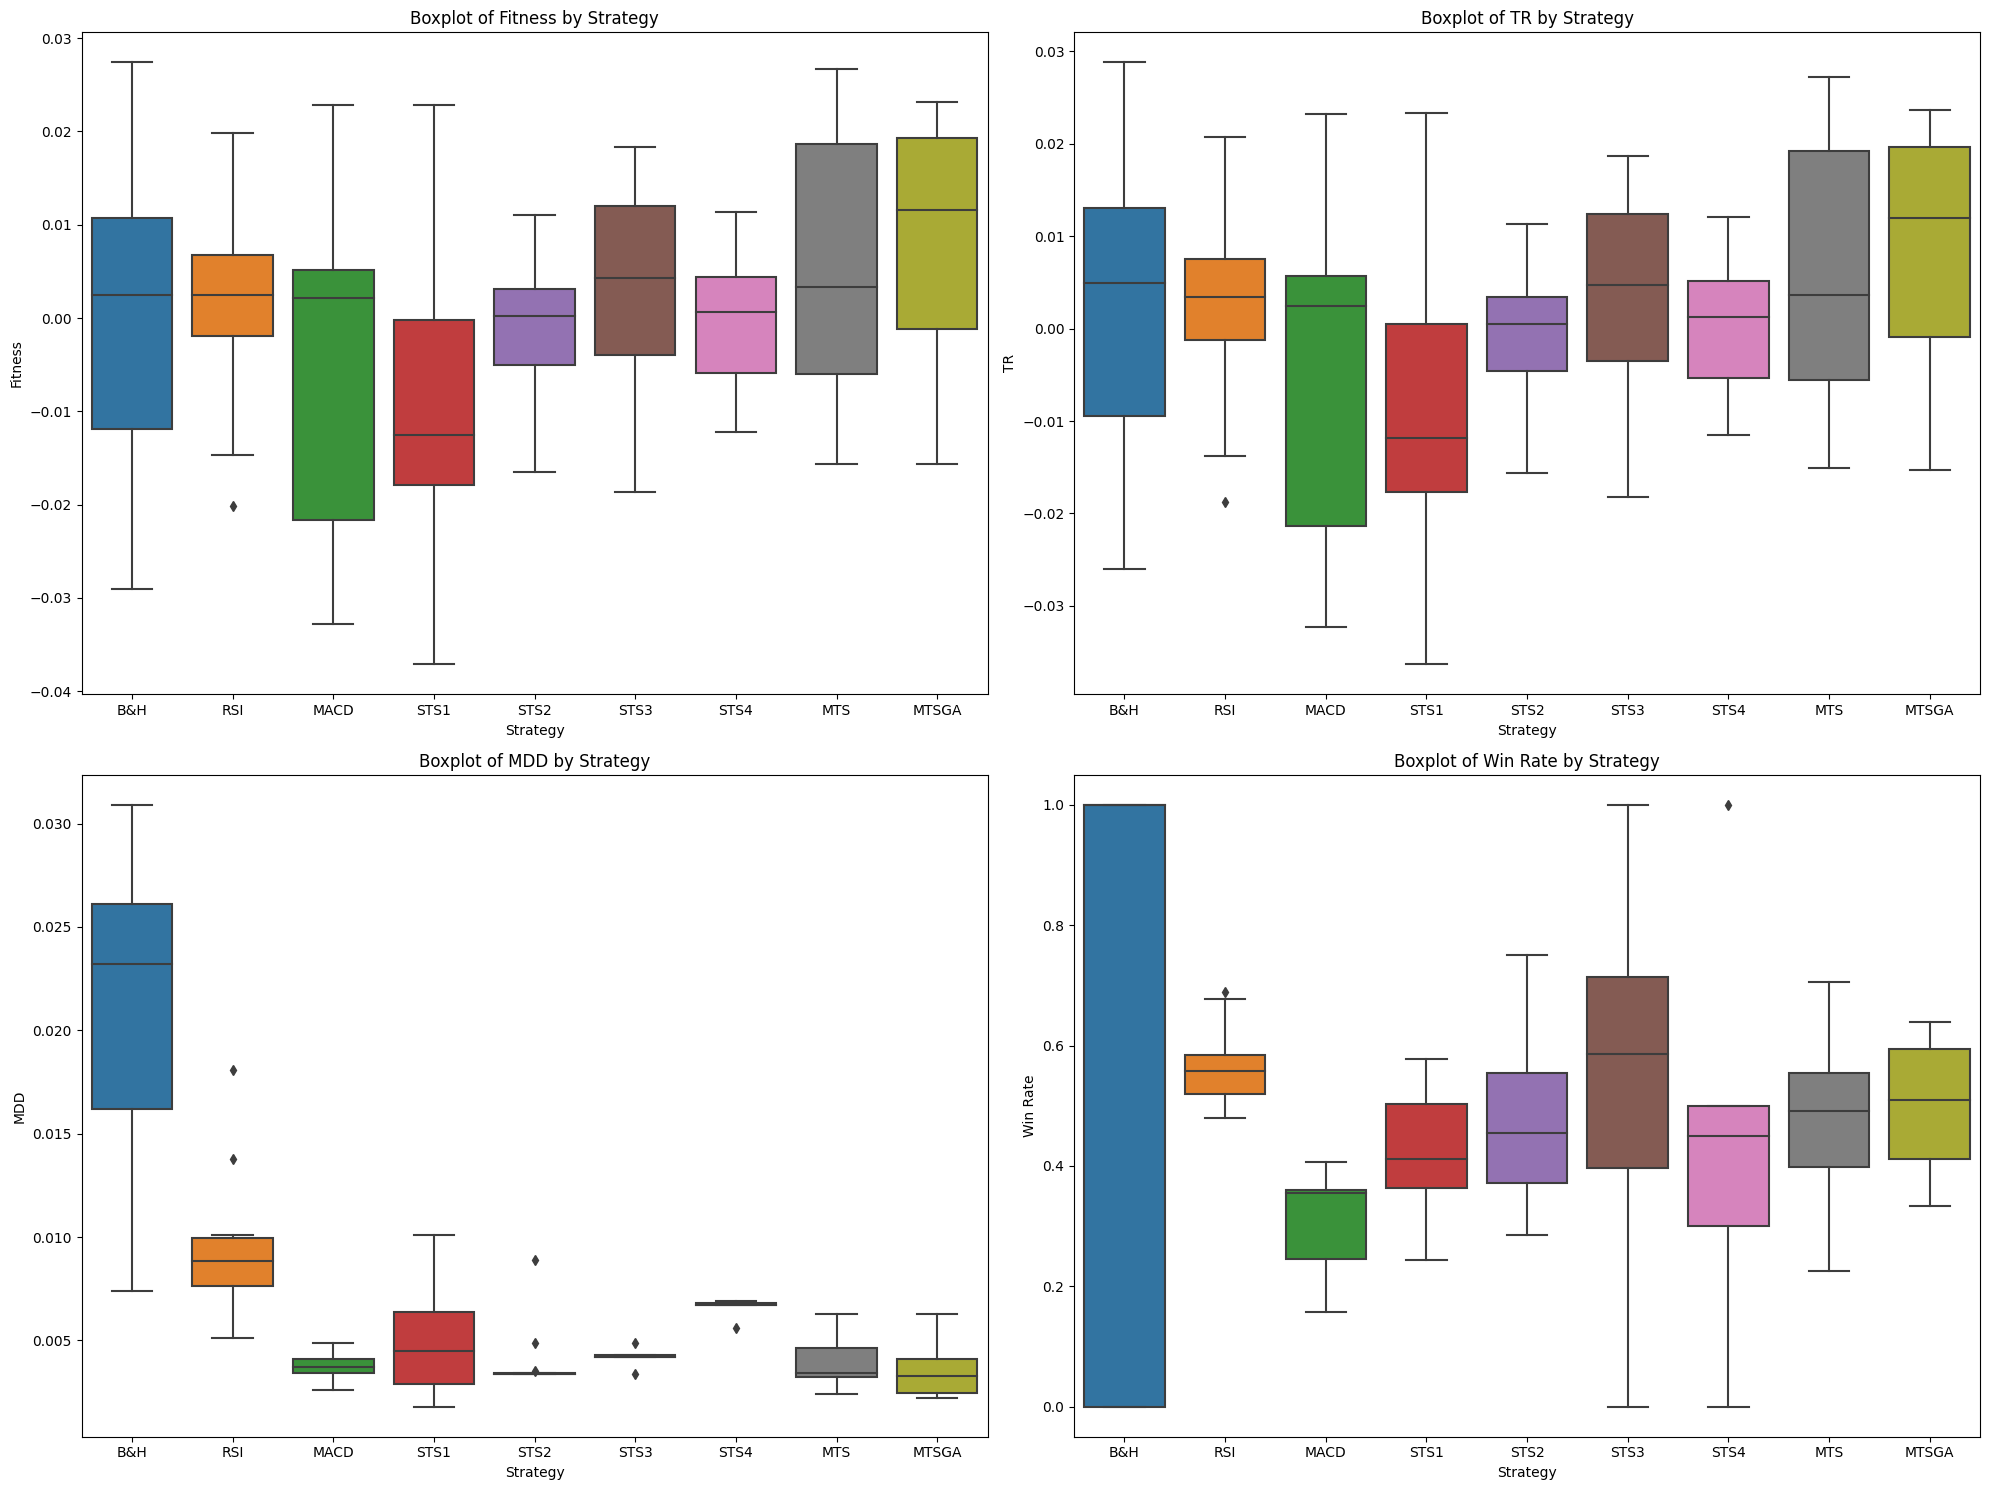

In [37]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Change the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%Y%m')

# Descriptive Statistics
desc_stats = data.groupby('Strategy').describe().transpose()

# Plotting Boxplots
plt.figure(figsize=(20, 15))
for i, column in enumerate(['Fitness', 'TR', 'MDD', 'Win Rate'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Strategy', y=column, data=data)
    plt.title(f'Boxplot of {column} by Strategy')

plt.tight_layout()
plt.show()



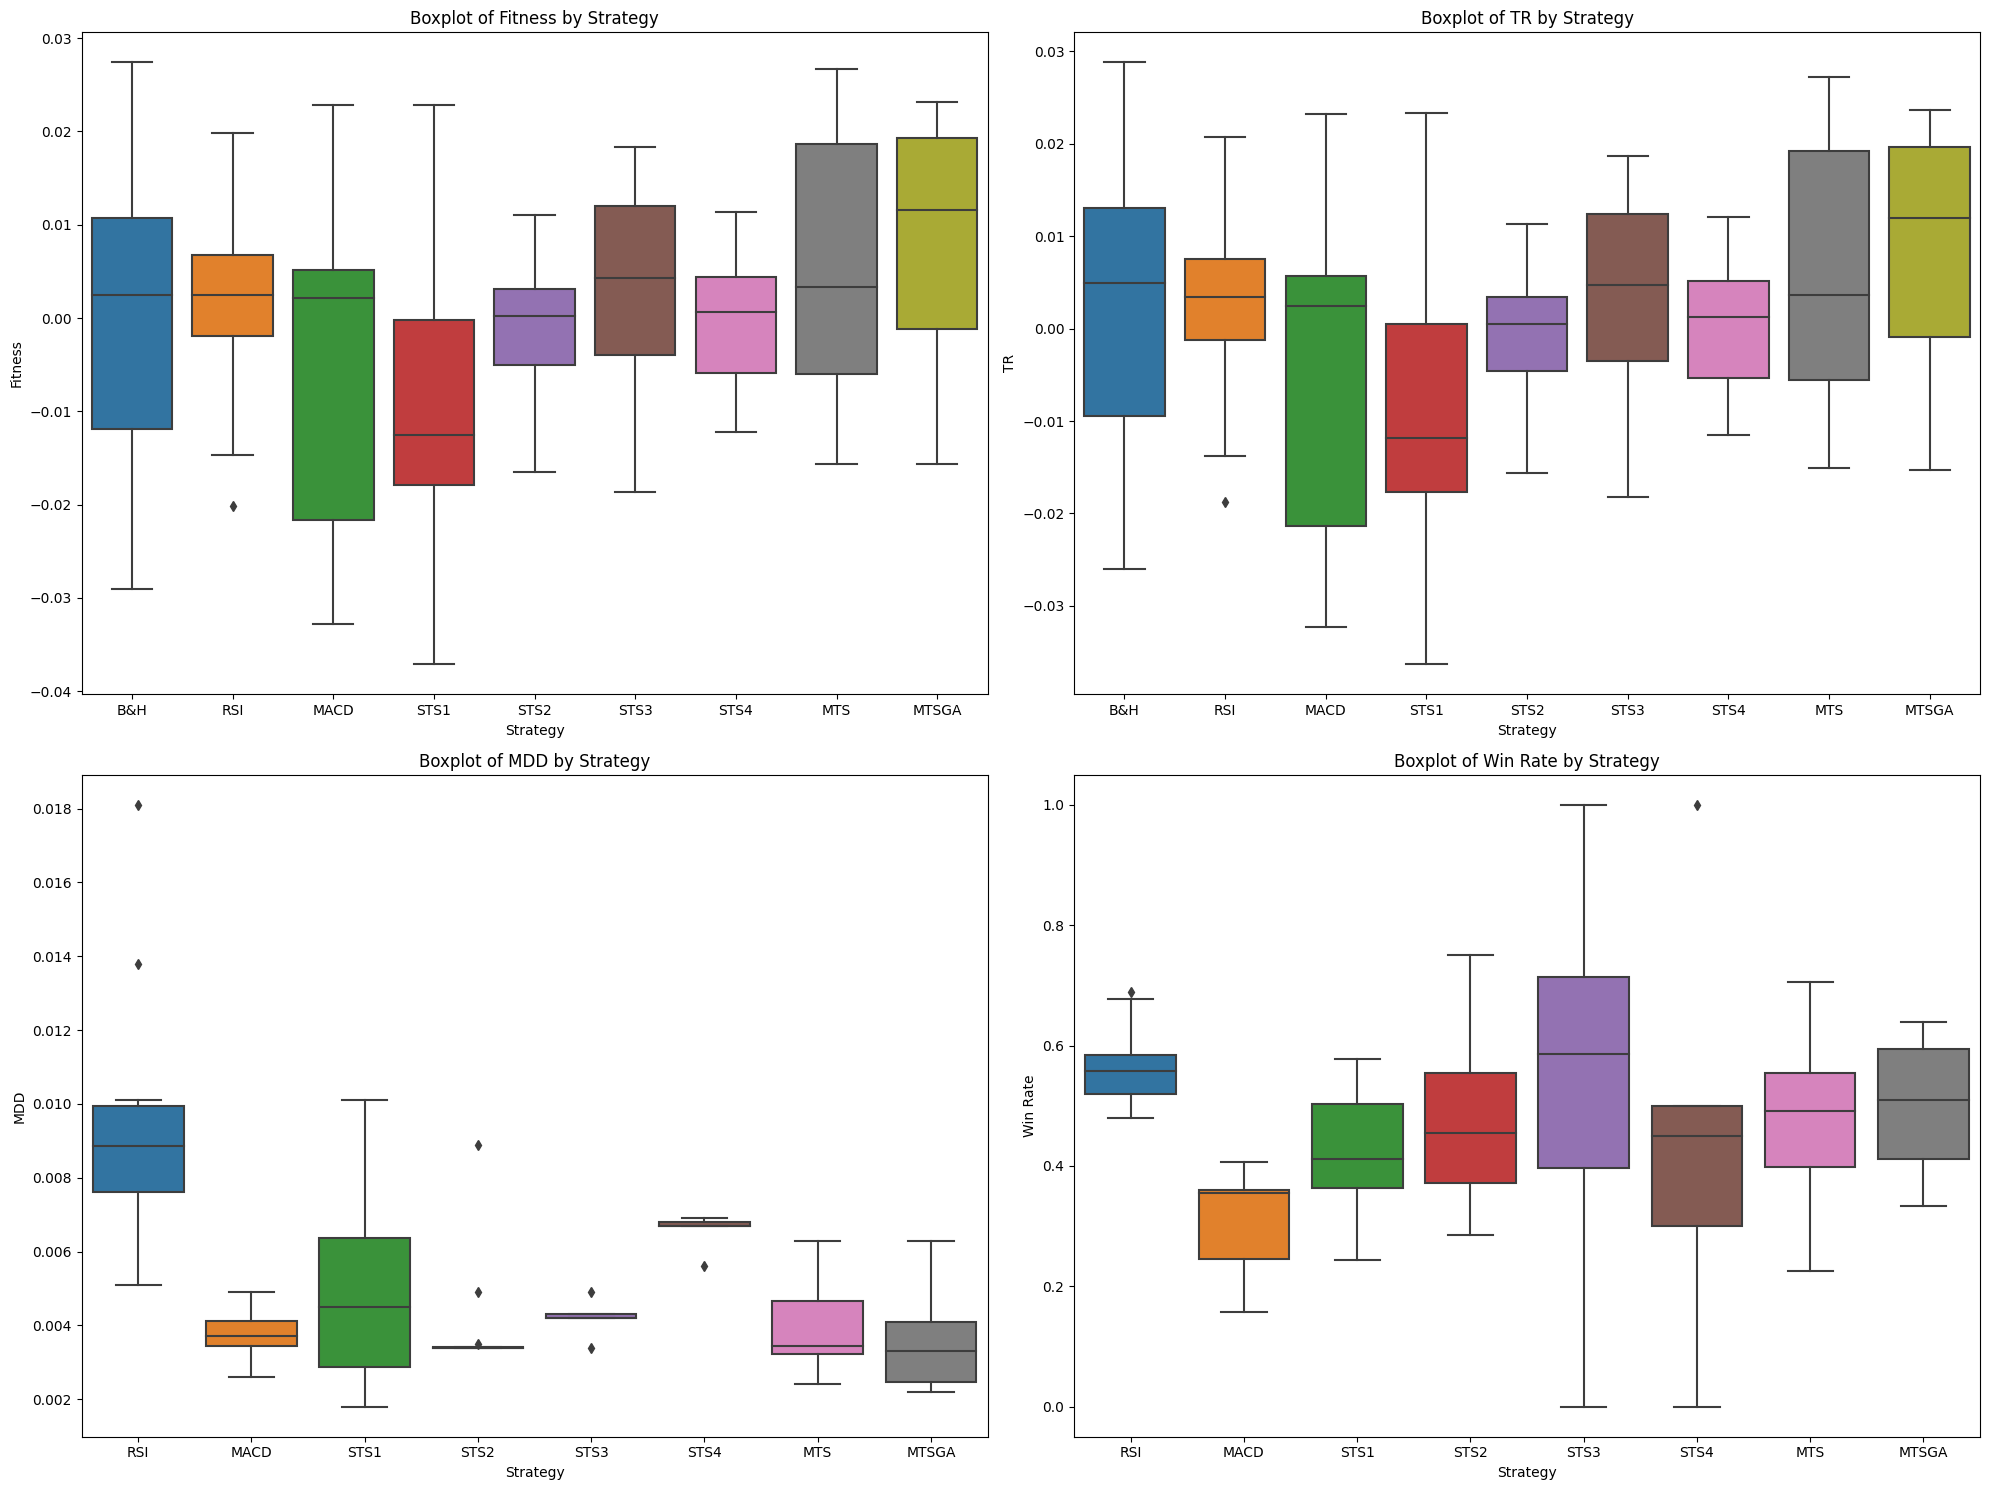

In [38]:

# Plotting Boxplots
plt.figure(figsize=(20, 15))
for i, column in enumerate(['Fitness', 'TR'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Strategy', y=column, data=data)
    plt.title(f'Boxplot of {column} by Strategy')
for i, column in enumerate(['MDD', 'Win Rate'], 1):
    plt.subplot(2, 2, i+2)
    sns.boxplot(x='Strategy', y=column, data=data[data['Strategy']!='B&H'])
    plt.title(f'Boxplot of {column} by Strategy')

plt.tight_layout()
plt.show()

In [39]:
desc_stats

Strategy                  B&H         MACD          MTS        MTSGA  \
Unnamed: 0                                                             
PnL        count    12.000000    12.000000    12.000000    12.000000   
           mean    394.416667  -684.833333   718.416667  1060.916667   
           std    2192.255188  2260.753448  1722.051338  1597.273498   
           min   -3308.000000 -4155.000000 -1942.000000 -1954.000000   
           25%   -1199.750000 -2725.250000  -698.500000  -141.000000   
           50%     623.500000   301.500000   450.000000  1507.000000   
           75%    1642.750000   693.000000  2391.250000  2488.250000   
           max    3603.000000  2911.000000  3435.000000  2977.000000   
Fitness    count    12.000000    12.000000    12.000000    12.000000   
           mean      0.001100    -0.005633     0.005400     0.008142   
           std       0.017987     0.017879     0.013616     0.012570   
           min      -0.029000    -0.032800    -0.015600    -0.015600   
           25%      -0.011850    -0.021700    -0.005975    -0.001225   
           50%       0.002500     0.002100     0.003300     0.011550   
           75%       0.010775     0.005200     0.018700     0.019350   
           max       0.027400     0.022800     0.026700     0.023200   
TR         count    12.000000    12.000000    12.000000    12.000000   
           mean      0.003250    -0.005242     0.005775     0.008475   
           std       0.017396     0.017862     0.013621     0.012628   
           min      -0.026000    -0.032300    -0.015100    -0.015300   
           25%      -0.009425    -0.021325    -0.005525    -0.000950   
           50%       0.004950     0.002450     0.003650     0.012000   
           75%       0.013075     0.005650     0.019200     0.019625   
           max       0.028800     0.023200     0.027200     0.023700   
std(RR)    count     0.000000    12.000000    12.000000    12.000000   
           mean           NaN     0.002158     0.001983     0.001700   
           std            NaN     0.000462     0.000374     0.000322   
           min            NaN     0.001500     0.001300     0.001200   
           25%            NaN     0.001800     0.001700     0.001525   
           50%            NaN     0.002100     0.002000     0.001700   
           75%            NaN     0.002450     0.002300     0.001925   
           max            NaN     0.003100     0.002600     0.002200   
MDD        count    12.000000    12.000000    12.000000    12.000000   
           mean      0.021583     0.003800     0.003858     0.003525   
           std       0.007246     0.000680     0.001084     0.001232   
           min       0.007400     0.002600     0.002400     0.002200   
           25%       0.016200     0.003450     0.003225     0.002475   
           50%       0.023200     0.003700     0.003450     0.003300   
           75%       0.026100     0.004125     0.004650     0.004100   
           max       0.030900     0.004900     0.006300     0.006300   
Win Rate   count    12.000000    12.000000    12.000000    12.000000   
           mean      0.583333     0.312533     0.476400     0.497925   
           std       0.514929     0.077553     0.129780     0.107697   
           min       0.000000     0.157100     0.225800     0.333300   
           25%       0.000000     0.245275     0.398225     0.411200   
           50%       1.000000     0.354700     0.492000     0.509800   
           75%       1.000000     0.360600     0.553700     0.593800   
           max       1.000000     0.406200     0.705900     0.640000   
nTrade     count    12.000000    12.000000    12.000000    12.000000   
           mean      1.000000    52.000000    33.166667    40.833333   
           std       0.000000    12.540842    10.098005     9.523496   
           min       1.000000    32.000000    17.000000    25.000000   
           25%       1.000000    43.750000    27.750000    35.500000   
           50%       1.000000    48.5000

In [40]:
avgdf

,B&H,RSI,MACD,STS1,STS2,STS3,STS4,MTS,MTSGA
Index,,,,,,,,,
PnL,394.416667,295.166667,-684.833333,-1103.833333,-47.416667,451.833333,-20.000000,718.416667,1060.916667
Fitness,0.001100,0.001583,-0.005633,-0.009125,-0.000708,0.003192,-0.000808,0.005400,0.008142
TR,0.003250,0.002542,-0.005242,-0.008625,-0.000333,0.003592,-0.000117,0.005775,0.008475
std(RR),NaN,0.002492,0.002158,0.001650,0.002817,0.003350,0.004917,0.001983,0.001700
MDD,0.021583,0.009500,0.003800,0.004933,0.003992,0.004217,0.006658,0.003858,0.003525
Win Rate,0.583333,0.565450,0.312533,0.427158,0.475600,0.544050,0.397217,0.476400,0.497925
nTrade,1.000000,44.583333,52.000000,50.166667,12.166667,7.416667,3.333333,33.166667,40.833333


# box-plot

In [41]:
# Define a function to analyze a given column
from scipy import stats

def analyze_column(data, column):
    strategies = data['Strategy'].unique()

    # Boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Strategy', y=column, data=data)
    plt.title(f'Boxplot of {column} by Strategy')
    plt.show()

    # ANOVA
    group_data = [data[data['Strategy'] == strategy][column].values for strategy in strategies]
    f_val, p_val = stats.f_oneway(*group_data)
    print(f"ANOVA for {column}: F={f_val}, p={p_val}")

    # Skewness and Kurtosis
    for strategy in strategies:
        skewness = stats.skew(data[data['Strategy'] == strategy][column])
        kurtosis = stats.kurtosis(data[data['Strategy'] == strategy][column])
        print(f"For {strategy}, {column}: skewness={skewness}, kurtosis={kurtosis}")


=== Analysis for Fitness ===


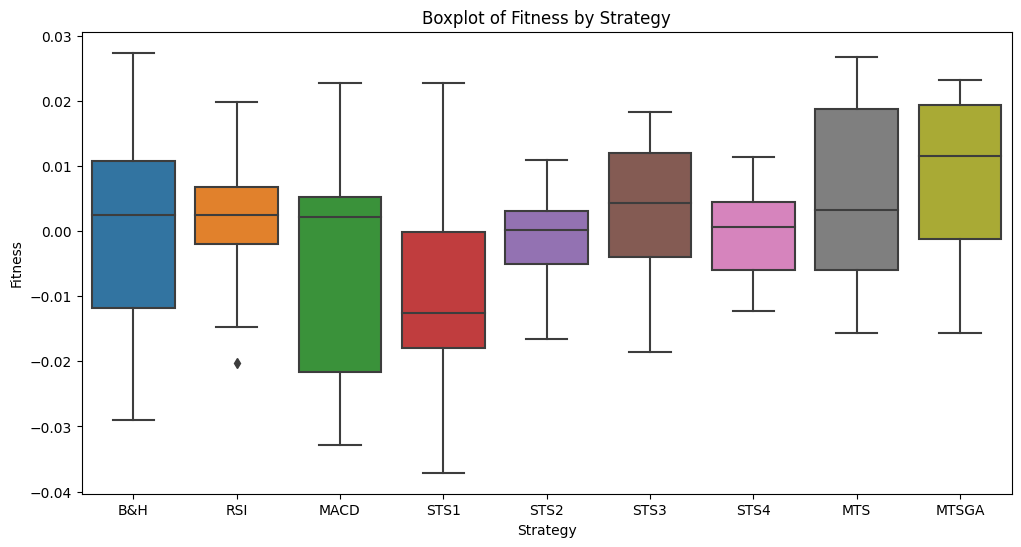

ANOVA for Fitness: F=1.869889645688336, p=0.07320385063572833
For B&H, Fitness: skewness=-0.02516659009507123, kurtosis=-0.9568627820542828
For RSI, Fitness: skewness=-0.3511820999287934, kurtosis=-0.31316476148415306
For MACD, Fitness: skewness=-0.19366203522702227, kurtosis=-1.2287141403101107
For STS1, Fitness: skewness=0.4047670544083001, kurtosis=-0.3148157433704166
For STS2, Fitness: skewness=-0.5622594200620261, kurtosis=0.20761281789807118
For STS3, Fitness: skewness=-0.490120063122796, kurtosis=-0.733777931693643
For STS4, Fitness: skewness=-0.1942764361007165, kurtosis=-0.9037840119301497
For MTS, Fitness: skewness=0.09265277128366875, kurtosis=-1.313095322644236
For MTSGA, Fitness: skewness=-0.47327789982575985, kurtosis=-0.9975290478790901


In [42]:
print(f"\n=== Analysis for Fitness ===")
analyze_column(data, 'Fitness')


=== Analysis for TR ===


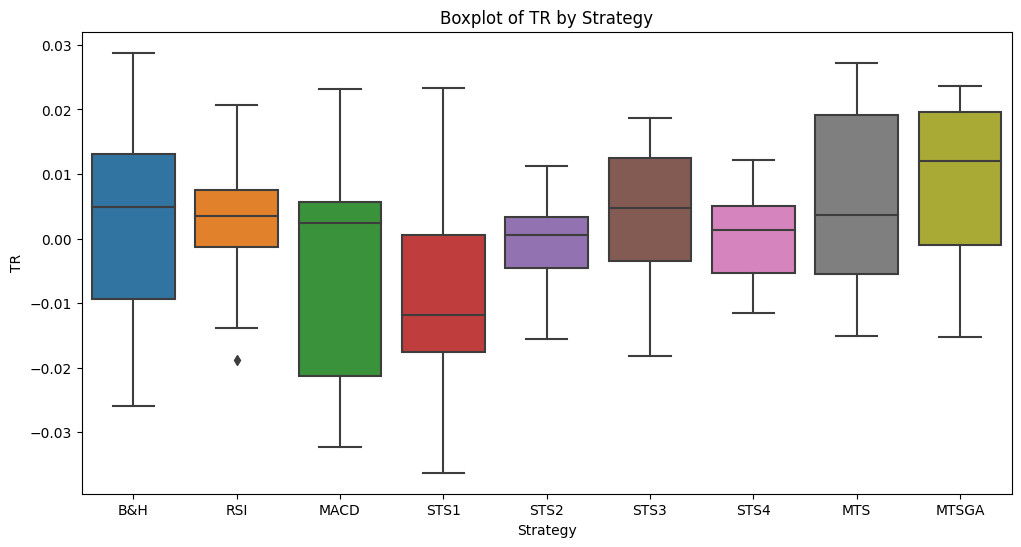

ANOVA for TR: F=1.9249995298006188, p=0.06443382964227162
For B&H, TR: skewness=-0.039335453702502056, kurtosis=-0.9779833492780718
For RSI, TR: skewness=-0.34921744559550594, kurtosis=-0.32938803515933657
For MACD, TR: skewness=-0.19208186767426588, kurtosis=-1.22736085974406
For STS1, TR: skewness=0.4149302670187775, kurtosis=-0.34590580724870135
For STS2, TR: skewness=-0.5084313471747416, kurtosis=0.10848195831505869
For STS3, TR: skewness=-0.4937738810970842, kurtosis=-0.7321986307267152
For STS4, TR: skewness=-0.19164894532233046, kurtosis=-0.9097567898043724
For MTS, TR: skewness=0.1020860349847726, kurtosis=-1.3139536780771803
For MTSGA, TR: skewness=-0.4653923499492138, kurtosis=-1.0057735600125803


In [43]:
print(f"\n=== Analysis for TR ===")
analyze_column(data, 'TR')


=== Analysis for MDD ===


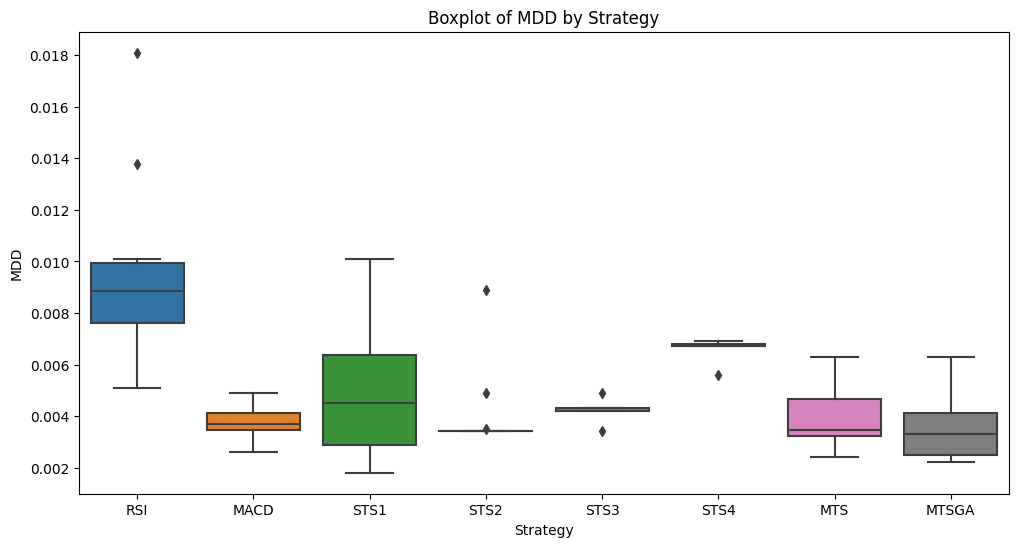

ANOVA for MDD: F=15.984054260969428, p=2.1923523630018922e-13
For RSI, MDD: skewness=1.371761694075743, kurtosis=1.4090516990592121
For MACD, MDD: skewness=0.1361468408328842, kurtosis=-0.6322152644305286
For STS1, MDD: skewness=0.6619062664564241, kurtosis=-0.7890509284082703
For STS2, MDD: skewness=2.6912124019489014, kurtosis=5.718453459344692
For STS3, MDD: skewness=-0.6234632138884495, kurtosis=2.946706641530115
For STS4, MDD: skewness=-2.809171074409876, kurtosis=6.383721005428249
For MTS, MDD: skewness=0.8649534619672082, kurtosis=0.12475100401314387
For MTSGA, MDD: skewness=0.931332505482347, kurtosis=0.09473036653278877


In [44]:
print(f"\n=== Analysis for MDD ===")
analyze_column(data[data['Strategy']!='B&H'], 'MDD')


=== Analysis for MDD ===


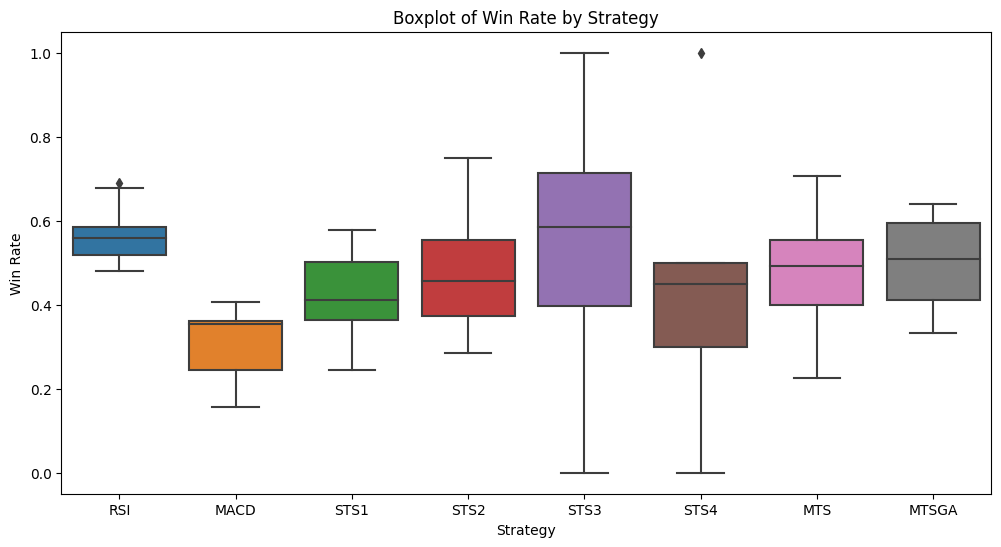

ANOVA for Win Rate: F=2.9762501771535854, p=0.007536782043644159
For RSI, Win Rate: skewness=0.738915133161034, kurtosis=-0.4546750924395546
For MACD, Win Rate: skewness=-0.6011514070099495, kurtosis=-0.8013102514817594
For STS1, Win Rate: skewness=-0.056544681054194114, kurtosis=-1.0704523083644448
For STS2, Win Rate: skewness=0.5598296777867258, kurtosis=-0.3479451068690449
For STS3, Win Rate: skewness=-0.37954093224232255, kurtosis=-0.43069708178865795
For STS4, Win Rate: skewness=0.4582034638411894, kurtosis=0.6386673373309706
For MTS, Win Rate: skewness=-0.15449617958625356, kurtosis=-0.3917074054238219
For MTSGA, Win Rate: skewness=-0.18999834954788408, kurtosis=-1.4332402515346696


In [45]:
print(f"\n=== Analysis for MDD ===")
analyze_column(data[data['Strategy']!='B&H'], 'Win Rate')

# Avg, Skewness, and Kurtosis

## PnL

In [46]:
avgdf

,B&H,RSI,MACD,STS1,STS2,STS3,STS4,MTS,MTSGA
Index,,,,,,,,,
PnL,394.416667,295.166667,-684.833333,-1103.833333,-47.416667,451.833333,-20.000000,718.416667,1060.916667
Fitness,0.001100,0.001583,-0.005633,-0.009125,-0.000708,0.003192,-0.000808,0.005400,0.008142
TR,0.003250,0.002542,-0.005242,-0.008625,-0.000333,0.003592,-0.000117,0.005775,0.008475
std(RR),NaN,0.002492,0.002158,0.001650,0.002817,0.003350,0.004917,0.001983,0.001700
MDD,0.021583,0.009500,0.003800,0.004933,0.003992,0.004217,0.006658,0.003858,0.003525
Win Rate,0.583333,0.565450,0.312533,0.427158,0.475600,0.544050,0.397217,0.476400,0.497925
nTrade,1.000000,44.583333,52.000000,50.166667,12.166667,7.416667,3.333333,33.166667,40.833333


In [47]:
unique_strategies = data['Strategy'].unique()

# Calculate skewness and kurtosis for PnL for each strategy
skewness_kurtosis = {strategy: {"skewness": stats.skew(data[data['Strategy'] == strategy]['PnL']),
                                 "kurtosis": stats.kurtosis(data[data['Strategy'] == strategy]['PnL'])} 
                     for strategy in unique_strategies}
skewness_kurtosis


{'B&H': {'skewness': -0.05879309741344513, 'kurtosis': -0.9830015498787841},
 'RSI': {'skewness': -0.3345042992554461, 'kurtosis': -0.3093001275073832},
 'MACD': {'skewness': -0.2012883477159463, 'kurtosis': -1.2169168765656864},
 'STS1': {'skewness': 0.39767897402277963, 'kurtosis': -0.3210451945094892},
 'STS2': {'skewness': -0.5359870708978723, 'kurtosis': 0.1270122863889025},
 'STS3': {'skewness': -0.47668571450167574, 'kurtosis': -0.772426411488031},
 'STS4': {'skewness': -0.18623212671790204, 'kurtosis': -0.9333975867411493},
 'MTS': {'skewness': 0.09842511207075536, 'kurtosis': -1.2966387330135065},
 'MTSGA': {'skewness': -0.47187845256428174, 'kurtosis': -1.001493427696171}}

1. Profitability: The MTSGA strategy shows a positive average PnL, suggesting that it has been profitable on average during the period covered by the data.


2. Risk and Return Distribution: The positive skewness indicates that the MTSGA strategy has a distribution with a long tail in the positive direction. This can be interpreted as the strategy having a tendency for exceptionally good outcomes, albeit rarely. The positive kurtosis suggests that the PnL distribution for MTSGA has heavier tails and a sharper peak than a normal distribution, meaning that while most results will be close to the average, extreme outcomes (both good and bad) are more likely than they would be in a normally distributed scenario.


3. Comparison with Other Strategies: While the ANOVA test did not find significant evidence to suggest that the average PnL differs between strategies, the p-value was close to the threshold, indicating that there might be some differences between strategies. Further investigation or testing with a larger dataset might provide more definitive insights.

# PnL
## Hist

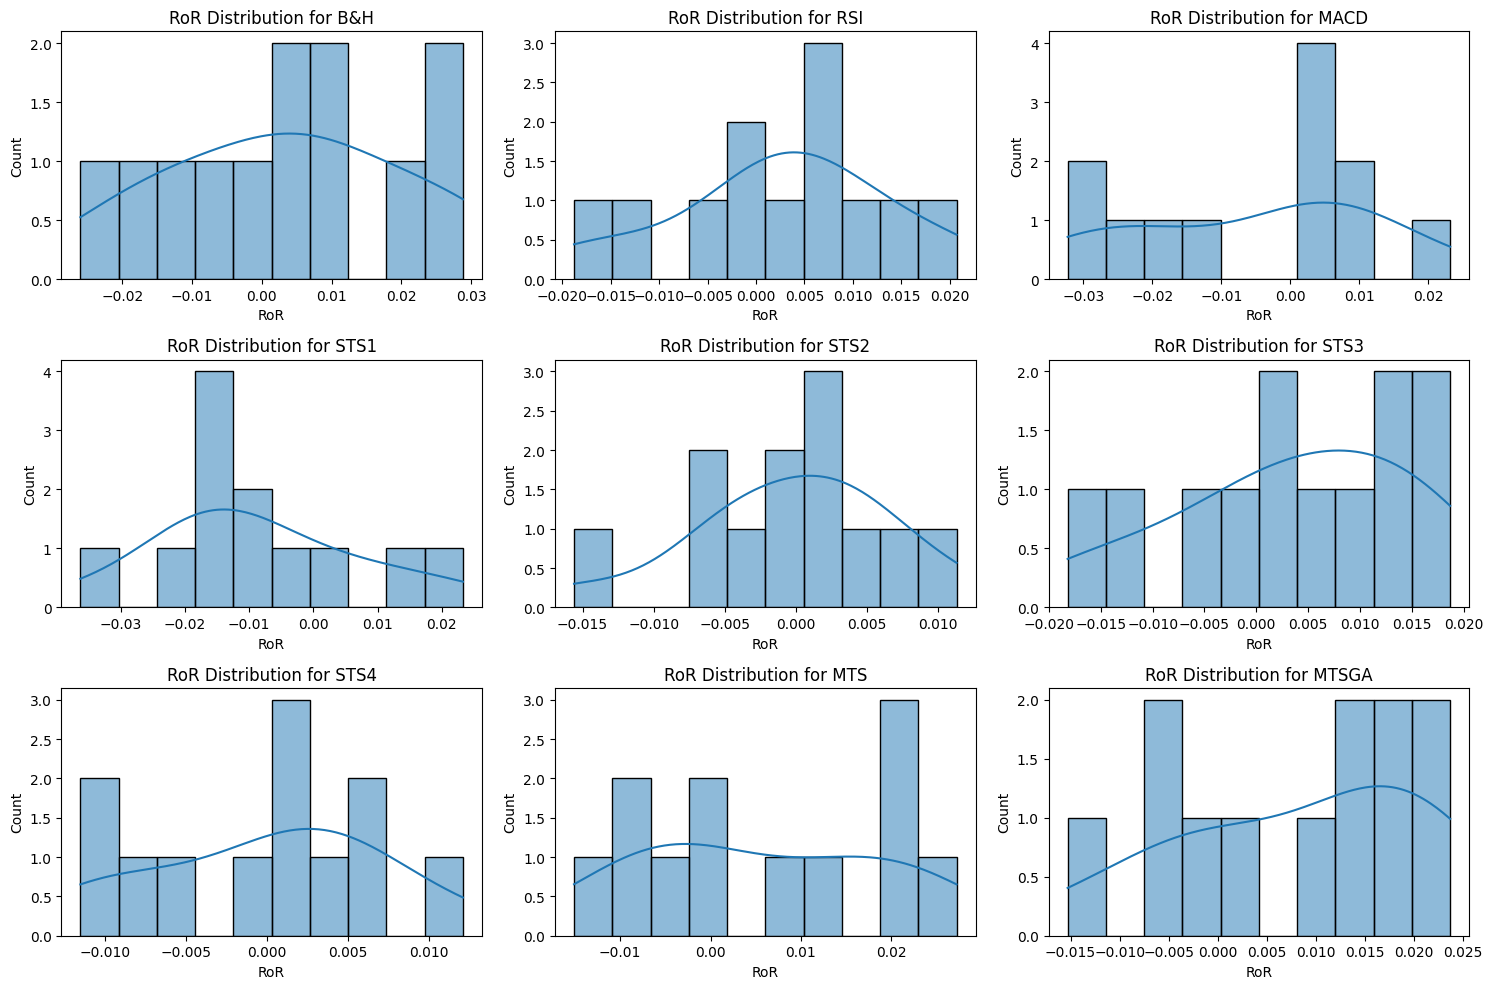

In [48]:
# Create histograms for PnL of each strategy
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(unique_strategies, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[data['Strategy'] == strategy]['TR'], bins=10, kde=True)
    plt.title(f'RoR Distribution for {strategy}')
    plt.xlabel('RoR')

plt.tight_layout()
plt.show()

These histograms represent the distribution of the Profit and Loss (PnL) for each strategy. The y-axis shows the frequency (number of occurrences), and the x-axis shows the range of PnL values. The blue line (Kernel Density Estimate) gives an indication of the shape of the distribution.

Looking at the histogram for the MTSGA strategy, you can see that the PnL values are distributed mostly on the positive side, which is consistent with our previous finding that the MTSGA strategy has a positive average PnL. However, there is also a noticeable spread in the PnL values, indicating variability in the performance of this strategy.

From the plots, it is also visible that none of the strategies have a perfectly normal distribution of PnL values. This is especially important as our previous statistical tests (ANOVA and Tukey's HSD) assumed normality. The fact that our data do not perfectly meet this assumption doesn't invalidate our results, but it does mean we should be cautious in our interpretation.

In [49]:
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['PnL'] for strategy in unique_strategies])
kruskal_result

KruskalResult(statistic=11.967720013591588, pvalue=0.15264995817032628)

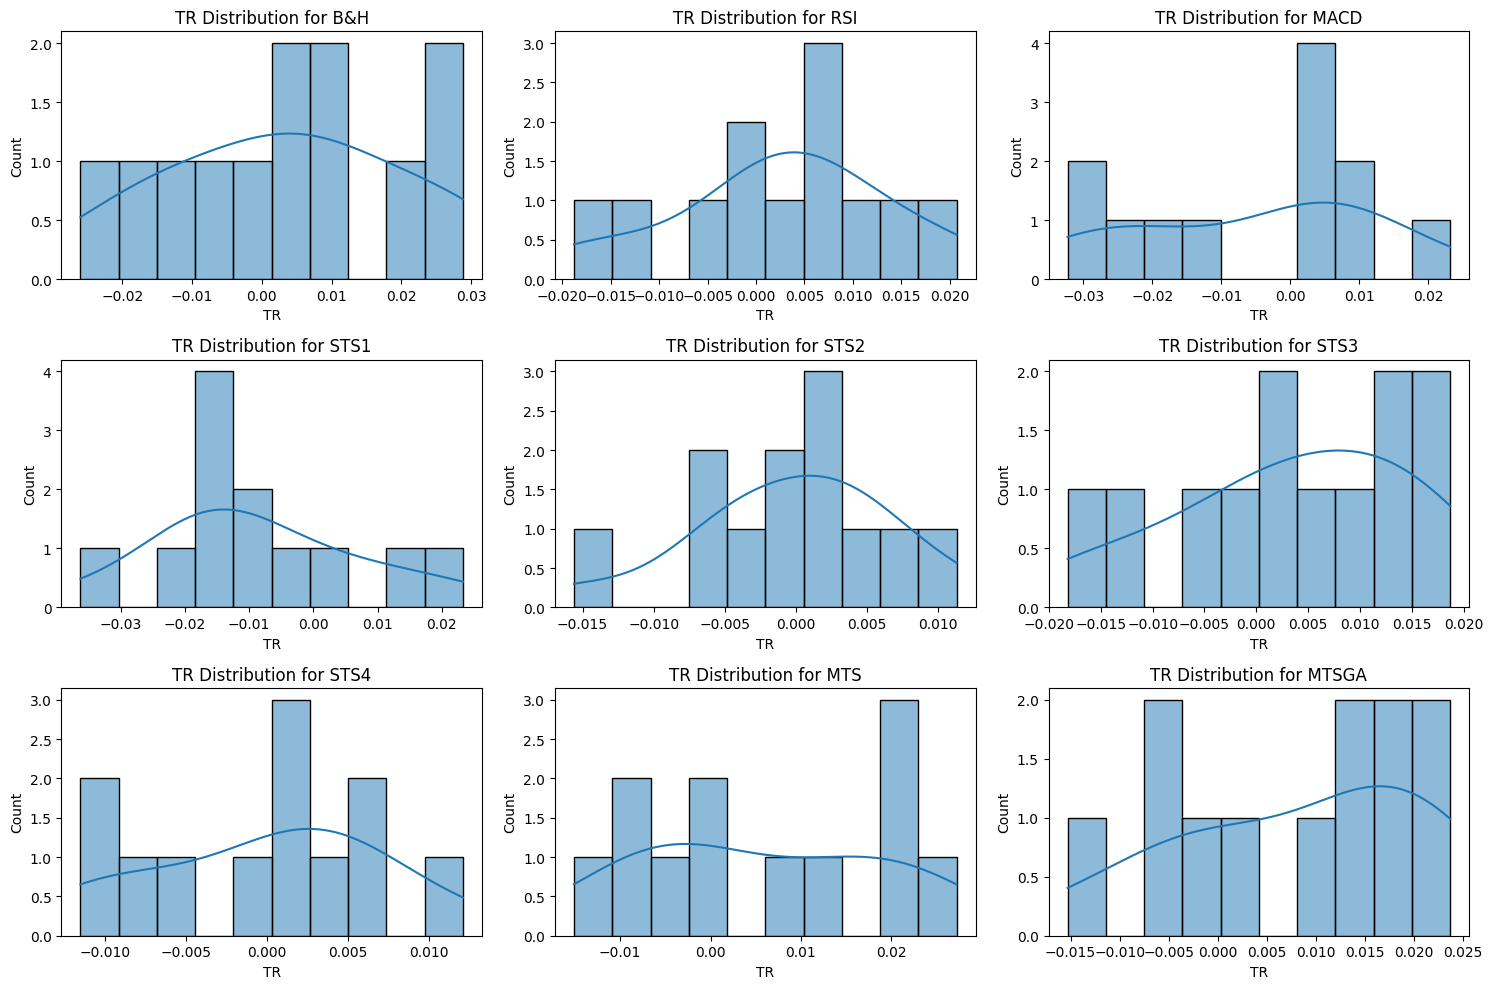

In [50]:
# Create histograms for PnL of each strategy
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(unique_strategies, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[data['Strategy'] == strategy]['TR'], bins=10, kde=True)
    plt.title(f'TR Distribution for {strategy}')

plt.tight_layout()
plt.show()

In [51]:
# Check if the assumptions of normality and homogeneity of variances are met for 'TR'

# Normality
print("Shapiro-Wilk Test for Normality:")
for strategy in unique_strategies:
    _, p = stats.shapiro(data[data['Strategy'] == strategy]['TR'])
    print(f"{strategy}: p-value = {p}")

# Homogeneity of variances
_, p = stats.levene(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])
print(f"\nLevene's Test for Homogeneity of Variances: p-value = {p}")

Shapiro-Wilk Test for Normality:
B&H: p-value = 0.855484664440155
RSI: p-value = 0.8299899697303772
MACD: p-value = 0.29048919677734375
STS1: p-value = 0.8157139420509338
STS2: p-value = 0.8581136465072632
STS3: p-value = 0.7264310717582703
STS4: p-value = 0.7443581819534302
MTS: p-value = 0.4893369972705841
MTSGA: p-value = 0.38644546270370483

Levene's Test for Homogeneity of Variances: p-value = 0.07568328573858427


In [52]:
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])
kruskal_result

KruskalResult(statistic=11.989541155772397, pvalue=0.15167114109785645)

In [53]:
# Perform ANOVA for 'TR'
anova_result = stats.f_oneway(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])

anova_result


F_onewayResult(statistic=1.9249995298006188, pvalue=0.06443382964227162)

In [54]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test for 'TR'
tukey_result = pairwise_tukeyhsd(endog=data['TR'], groups=data['Strategy'], alpha=0.1)

# Convert the result to a DataFrame
tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

# Display the results
tukey_df.sort_values(by='p-adj')


,group1,group2,meandiff,p-adj,lower,upper,reject
22,MTSGA,STS1,-0.0171,0.0536,-0.0329,-0.0013,True
17,MTS,STS1,-0.0144,0.1801,-0.0302,0.0014,False
9,MACD,MTSGA,0.0137,0.2336,-0.0021,0.0295,False
31,STS1,STS3,0.0122,0.3839,-0.0036,0.0280,False
4,B&H,STS1,-0.0119,0.4235,-0.0277,0.0039,False
26,RSI,STS1,-0.0112,0.5099,-0.0270,0.0046,False
8,MACD,MTS,0.0110,0.5287,-0.0048,0.0268,False
13,MACD,STS3,0.0088,0.7887,-0.0070,0.0246,False
23,MTSGA,STS2,-0.0088,0.7912,-0.0246,0.0070,False
25,MTSGA,STS4,-0.0086,0.8128,-0.0244,0.0072,False


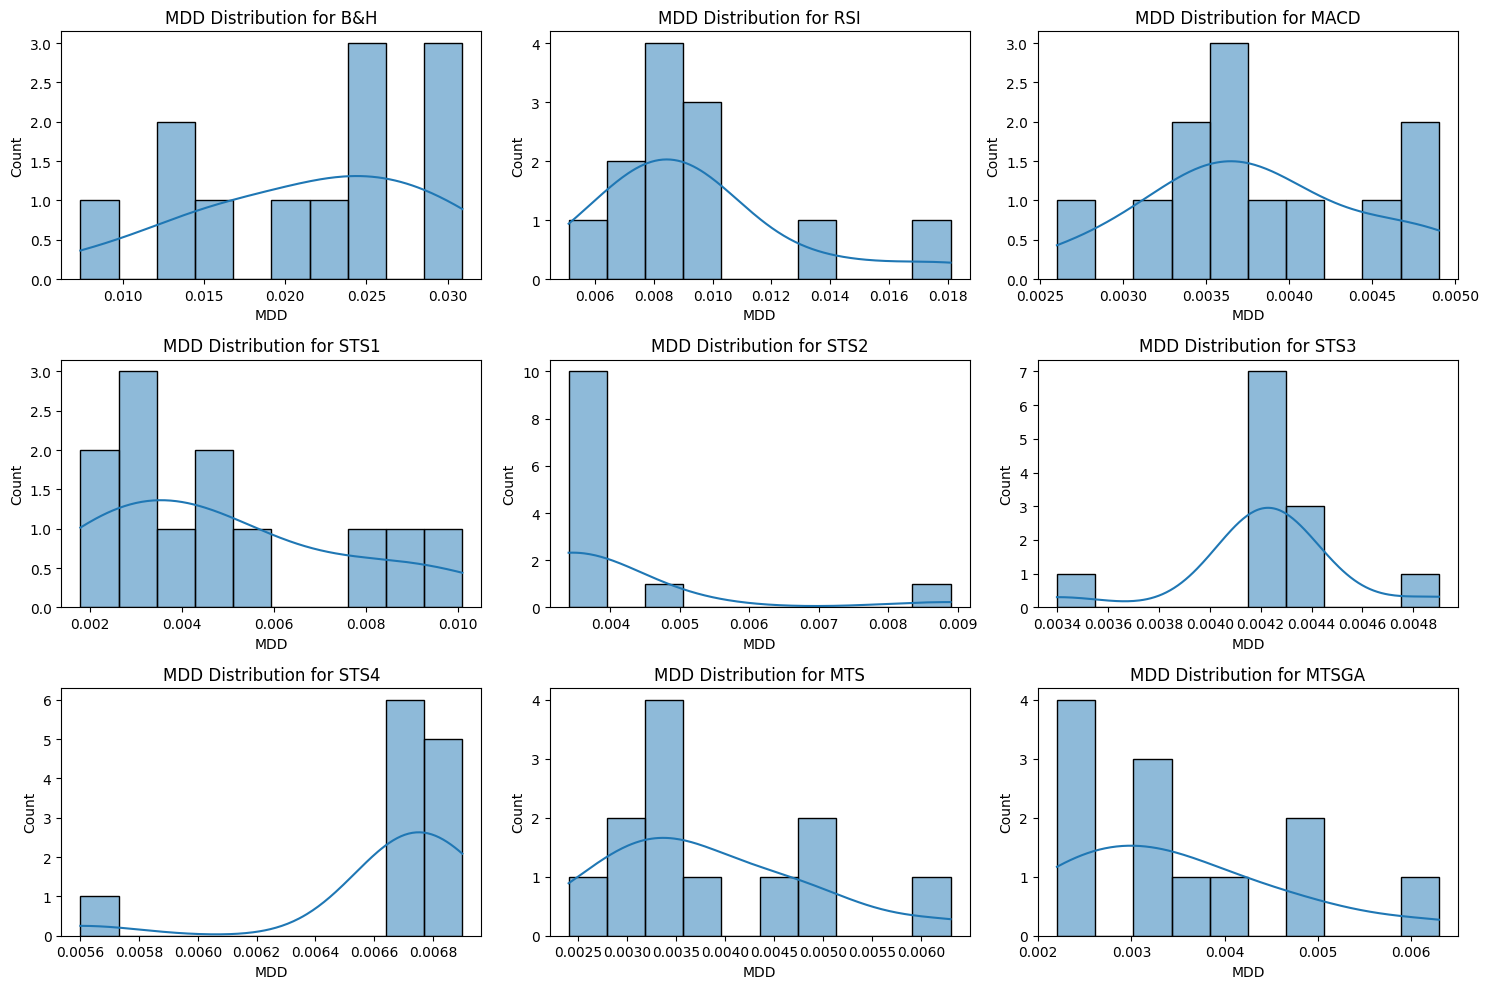

In [55]:
# Create histograms for PnL of each strategy
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(unique_strategies, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[data['Strategy'] == strategy]['MDD'], bins=10, kde=True)
    plt.title(f'MDD Distribution for {strategy}')

plt.tight_layout()
plt.show()

In [56]:
# Check if the assumptions of normality and homogeneity of variances are met for 'MDD'

# Normality
print("Shapiro-Wilk Test for Normality:")
for strategy in unique_strategies:
    _, p = stats.shapiro(data[data['Strategy'] == strategy]['MDD'])
    print(f"{strategy}: p-value = {p}")

# Homogeneity of variances
_, p = stats.levene(*[data[data['Strategy'] == strategy]['MDD'] for strategy in unique_strategies])
print(f"\nLevene's Test for Homogeneity of Variances: p-value = {p}")

Shapiro-Wilk Test for Normality:
B&H: p-value = 0.5998128652572632
RSI: p-value = 0.04274958744645119
MACD: p-value = 0.8406492471694946
STS1: p-value = 0.22964665293693542
STS2: p-value = 6.6997140493185725e-06
STS3: p-value = 0.000685014994814992
STS4: p-value = 1.6540667274966836e-05
MTS: p-value = 0.26846927404403687
MTSGA: p-value = 0.15343743562698364

Levene's Test for Homogeneity of Variances: p-value = 3.915838912430128e-10


In [57]:
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['MDD'] for strategy in unique_strategies])
kruskal_result

KruskalResult(statistic=70.27185175281946, pvalue=4.3385296338922836e-12)

## Kruskal-Wallis

In [58]:
# Perform Kruskal-Wallis test
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['PnL'] for strategy in unique_strategies])

kruskal_result

KruskalResult(statistic=11.967720013591588, pvalue=0.15264995817032628)

## M-W U Test

The Mann-Whitney U test is a non-parametric test that can be used to compare two independent samples. However, please note that performing multiple tests increases the likelihood of Type I errors (false positives), so a correction method such as the Bonferroni correction is usually applied to control the family-wise error rate.

In [59]:
from scipy.stats import mannwhitneyu
from itertools import combinations

# Get all combinations of strategies
strategy_combinations = list(combinations(unique_strategies, 2))

# Initialize an empty DataFrame to store the results
mann_whitney_results = pd.DataFrame(columns=['Group1', 'Group2', 'Statistic', 'p-value'])

# Perform Mann-Whitney U test for each pair of strategies
for group1, group2 in strategy_combinations:
    stat, p = mannwhitneyu(data[data['Strategy'] == group1]['TR'], 
                           data[data['Strategy'] == group2]['TR'],
                           alternative='two-sided')
    temp_df = pd.DataFrame({'Group1': [group1], 
                            'Group2': [group2], 
                            'Statistic': [stat], 
                            'p-value': [p]})
    mann_whitney_results = pd.concat([mann_whitney_results, temp_df])

# Apply Bonferroni correction
mann_whitney_results['p-value'] *= len(strategy_combinations)
mann_whitney_results['p-value'] = mann_whitney_results['p-value'].clip(upper=1)

# Display the results
mann_whitney_results.sort_values(by='p-value')

,Group1,Group2,Statistic,p-value
0,STS1,MTSGA,28.0,0.432822
0,STS1,MTS,33.0,0.943085
0,B&H,RSI,73.0,1.000000
0,MACD,MTSGA,42.0,1.000000
0,STS1,STS2,43.0,1.000000
0,STS1,STS3,39.0,1.000000
0,STS1,STS4,41.5,1.000000
0,MACD,MTS,49.0,1.000000
0,STS2,STS3,51.5,1.000000
0,STS2,MTS,55.5,1.000000


In [60]:
from scipy.stats import mannwhitneyu
from itertools import combinations

# Get all combinations of strategies
strategy_combinations = list(combinations(unique_strategies, 2))

# Initialize an empty DataFrame to store the results
mann_whitney_results = pd.DataFrame(columns=['Group1', 'Group2', 'Statistic', 'p-value'])

# Perform Mann-Whitney U test for each pair of strategies
for group1, group2 in strategy_combinations:
    stat, p = mannwhitneyu(data[data['Strategy'] == group1]['TR'], 
                           data[data['Strategy'] == group2]['TR'],
                           alternative='two-sided')
    temp_df = pd.DataFrame({'Group1': [group1], 
                            'Group2': [group2], 
                            'Statistic': [stat], 
                            'p-value': [p]})
    mann_whitney_results = pd.concat([mann_whitney_results, temp_df])

# Apply Bonferroni correction
mann_whitney_results['p-value'] *= len(strategy_combinations)
mann_whitney_results['p-value'] = mann_whitney_results['p-value'].clip(upper=1)

# Display the results
mann_whitney_results.sort_values(by='p-value')

,Group1,Group2,Statistic,p-value
0,STS1,MTSGA,28.0,0.432822
0,STS1,MTS,33.0,0.943085
0,B&H,RSI,73.0,1.000000
0,MACD,MTSGA,42.0,1.000000
0,STS1,STS2,43.0,1.000000
0,STS1,STS3,39.0,1.000000
0,STS1,STS4,41.5,1.000000
0,MACD,MTS,49.0,1.000000
0,STS2,STS3,51.5,1.000000
0,STS2,MTS,55.5,1.000000


# Total Return (RoR)

In [61]:
# Check if the assumptions of normality and homogeneity of variances are met for 'TR'

# Normality
print("Shapiro-Wilk Test for Normality:")
for strategy in unique_strategies:
    _, p = stats.shapiro(data[data['Strategy'] == strategy]['TR'])
    print(f"{strategy}: p-value = {p}")

# Homogeneity of variances
_, p = stats.levene(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])
print(f"\nLevene's Test for Homogeneity of Variances: p-value = {p}")


Shapiro-Wilk Test for Normality:
B&H: p-value = 0.855484664440155
RSI: p-value = 0.8299899697303772
MACD: p-value = 0.29048919677734375
STS1: p-value = 0.8157139420509338
STS2: p-value = 0.8581136465072632
STS3: p-value = 0.7264310717582703
STS4: p-value = 0.7443581819534302
MTS: p-value = 0.4893369972705841
MTSGA: p-value = 0.38644546270370483

Levene's Test for Homogeneity of Variances: p-value = 0.07568328573858427


## ANOVA

In [62]:
# Perform ANOVA for 'TR'
anova_result = stats.f_oneway(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])

anova_result

F_onewayResult(statistic=1.9249995298006188, pvalue=0.06443382964227162)

# MDD

In [63]:
# Check if the assumptions of normality and homogeneity of variances are met for 'MDD'

# Normality
print("Shapiro-Wilk Test for Normality:")
for strategy in unique_strategies:
    _, p = stats.shapiro(data[data['Strategy'] == strategy]['MDD'])
    print(f"{strategy}: p-value = {p}")

# Homogeneity of variances
_, p = stats.levene(*[data[data['Strategy'] == strategy]['MDD'] for strategy in unique_strategies])
print(f"\nLevene's Test for Homogeneity of Variances: p-value = {p}")


Shapiro-Wilk Test for Normality:
B&H: p-value = 0.5998128652572632
RSI: p-value = 0.04274958744645119
MACD: p-value = 0.8406492471694946
STS1: p-value = 0.22964665293693542
STS2: p-value = 6.6997140493185725e-06
STS3: p-value = 0.000685014994814992
STS4: p-value = 1.6540667274966836e-05
MTS: p-value = 0.26846927404403687
MTSGA: p-value = 0.15343743562698364

Levene's Test for Homogeneity of Variances: p-value = 3.915838912430128e-10


In [64]:
# Perform Kruskal-Wallis test for 'MDD'
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['MDD'] for strategy in unique_strategies])

kruskal_result

KruskalResult(statistic=70.27185175281946, pvalue=4.3385296338922836e-12)

In [65]:
# Initialize an empty DataFrame to store the results
mann_whitney_results = pd.DataFrame(columns=['Group1', 'Group2', 'Statistic', 'p-value'])

# Perform Mann-Whitney U test for each pair of strategies
for group1, group2 in strategy_combinations:
    stat, p = mannwhitneyu(data[data['Strategy'] == group1]['MDD'], 
                           data[data['Strategy'] == group2]['MDD'],
                           alternative='two-sided')
    temp_df = pd.DataFrame({'Group1': [group1], 
                            'Group2': [group2], 
                            'Statistic': [stat], 
                            'p-value': [p]})
    mann_whitney_results = pd.concat([mann_whitney_results, temp_df])

# Apply Bonferroni correction
mann_whitney_results['p-value'] *= len(strategy_combinations)
mann_whitney_results['p-value'] = mann_whitney_results['p-value'].clip(upper=1)

# Display the results
mann_whitney_results.sort_values(by='p-value')


,Group1,Group2,Statistic,p-value
0,STS3,STS4,0.0,0.000858
0,B&H,STS3,144.0,0.001036
0,RSI,STS3,144.0,0.001036
0,B&H,STS2,143.0,0.001046
0,MACD,STS4,0.0,0.001097
0,B&H,STS4,144.0,0.001101
0,B&H,MTS,144.0,0.001307
0,RSI,MACD,144.0,0.001312
0,B&H,MACD,144.0,0.001312
0,B&H,MTSGA,144.0,0.001312


In [68]:
mann_whitney_results[mann_whitney_results['Group2']=='MTSGA']

,Group1,Group2,Statistic,p-value
0,B&H,MTSGA,144.0,0.001312
0,RSI,MTSGA,143.0,0.001684
0,MACD,MTSGA,94.0,1.000000
0,STS1,MTSGA,91.0,1.000000
0,STS2,MTSGA,93.5,1.000000
0,STS3,MTSGA,108.0,1.000000
0,STS4,MTSGA,143.0,0.001414
0,MTS,MTSGA,88.0,1.000000
